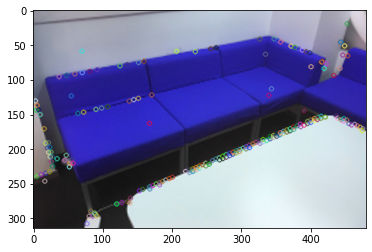

In [64]:
import cv2 
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline
#reading image
img1 = cv2.imread('data/duplicate_ads/17_828296168.jpg')  
#gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray1 = img1
#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

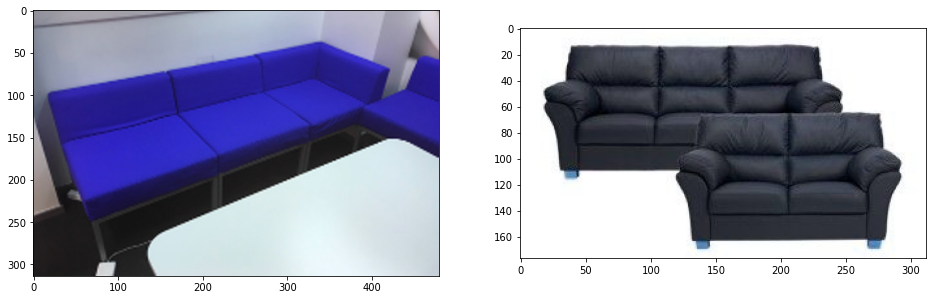

In [65]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('data/duplicate_ads/17_828296168.jpg')  
img2 = cv2.imread('data/duplicate_ads/91_410753649.jpg') 

#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [66]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# SIFT approach
# The scale-invariant feature transform (SIFT) is a computer vision algorithm to detect, describe, and match local features in images
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(212, 140)

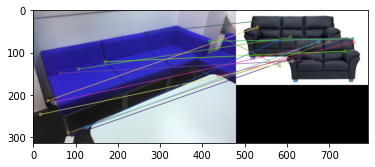

(<matplotlib.image.AxesImage at 0x7ff47226dd00>, None)

In [67]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [68]:
len(matches)

15

#### Applying the logic to entire dataset

In [54]:
def test_images(img1, img2):
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
    len(keypoints_1), len(keypoints_2)

    #feature matching
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)
    di = { 'image_1_keypoints':len(keypoints_1),'image_2_keypoints':len(keypoints_2), 'matches':len(matches)}
    return di


In [55]:

#Testing on entire duplicated dataset
directory_dup = 'data/duplicate_ads'

# variable name is different but same directory, 
# we are running like this becuase there seems to be lot of duplicates and it would be good way to test our logic
directory_non_dup = 'data/duplicate_ads' 

# The list to store the distance between reference image and the augmented images
li = []
          
# Iterating over the duplicated dataset
for f in os.listdir(directory_dup):
    path1 = os.path.join(directory_non_dup, f)
    img1 = cv2.imread(path1)  

    for filename in os.listdir(directory_non_dup):
        path2 = os.path.join(directory_non_dup, filename)
        img2 = cv2.imread(path2) 
        if f.endswith(".jpg") & filename.endswith(".jpg"): # bypassing the .DAT file in Mac systems
            res = test_images(img1,img2)
            res['image_1'] = f
            res['image_2'] = filename
            li.append(res)



In [56]:
df = pd.DataFrame(li)


In [69]:
df_fin = df[~df[['image_1','image_2']].apply(frozenset,axis=1).duplicated()].sort_values(by='matches').reset_index(drop=True)
df_fin.sort_values(by='matches', ascending=False)
# Here we can introduce a threshold to filter out the images with less matches

,image_1_keypoints,image_2_keypoints,matches,image_1,image_2
6104,2965,2965,2965,56_1802732655.jpg,56_1802732655.jpg
6103,2748,2748,2748,80_643274005.jpg,80_643274005.jpg
6102,2657,2657,2657,32_1415638875.jpg,32_1415638875.jpg
6101,2596,2596,2596,20_96321129.jpg,20_96321129.jpg
6100,1627,1627,1627,93_2015287802.jpg,93_2015287802.jpg
...,...,...,...,...,...
3,354,40,9,93_1957428244.jpg,66_642824605.jpg
5,41,54,9,69_1510609504.jpg,37_281871104.jpg
2,83,212,8,60_2091951686.jpg,17_828296168.jpg
1,53,40,8,82_9428376609.jpg,66_642824605.jpg


In [81]:
df_fin[df_fin['matches']>200]
# this is a non dl technique to find duplicate images
# We need to find the threshold value to filter the images, higher the match value more similair the images are

,image_1_keypoints,image_2_keypoints,matches,image_1,image_2
5926,2657,565,202,32_1415638875.jpg,34_1962130479.jpg
5927,202,202,202,53_1930148918.jpg,53_1930148918.jpg
5928,1220,2965,203,55_274624092.jpg,56_1802732655.jpg
5929,205,205,205,34_816663042.jpg,34_816663042.jpg
5930,1088,589,205,22_855454339.jpg,61_1233590726.jpg
...,...,...,...,...,...
6100,1627,1627,1627,93_2015287802.jpg,93_2015287802.jpg
6101,2596,2596,2596,20_96321129.jpg,20_96321129.jpg
6102,2657,2657,2657,32_1415638875.jpg,32_1415638875.jpg
6103,2748,2748,2748,80_643274005.jpg,80_643274005.jpg
